# __Inference__

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./stocks/TSLA02.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year,Percent Change,Trend,Rolling Mean,Bollinger High,Bollinger Low
0,2020-01-09,497.100006,498.799988,472.869995,481.339996,481.339996,28440400,1,2020,0.000000,Slight or No Change,NaN,NaN,NaN
1,2020-01-08,473.700012,498.489990,468.230011,492.140015,492.140015,31144300,1,2020,2.243740,Positive,NaN,NaN,NaN
2,2020-01-07,461.399994,471.630005,453.359985,469.059998,469.059998,17882100,1,2020,-4.689726,Among Top Losers,NaN,NaN,NaN
3,2020-01-06,440.470001,451.559998,440.000000,451.540009,451.540009,10133000,1,2020,-3.735128,Among Top Losers,NaN,NaN,NaN
4,2020-01-03,440.500000,454.000000,436.920013,443.010010,443.010010,17778500,1,2020,-1.889090,Negative,NaN,NaN,NaN


## Calls

In [3]:
#this function sets the calls based on the Bollinger Bands
def callsetter(frame):
    call = []
    for x in zip(frame['Close'], frame['Rolling Mean'], frame['Bollinger High'], frame['Bollinger Low']):
        if np.isnan(x[1]):
            call.append(np.nan)
        else:
            if x[0] < x[3]:
                call.append('Buy')
            elif x[3] < x[0] < x[1]:
                call.append('Hold Buy / Liquidate Short')
            elif x[1] < x[0] < x[2]:
                call.append('Hold Short / Liquidate Buy')
            elif x[2] < x[0]:
                call.append('Short')        
    return call

In [4]:
#setting calls on the TSLA02 stock
df['Call'] = callsetter(df)
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year,Percent Change,Trend,Rolling Mean,Bollinger High,Bollinger Low,Call
498,2018-01-17,340.470001,349.000000,339.750000,347.160004,347.160004,7103500,1,2018,0.751661,Slight Positive,346.305004,357.912710,334.697297,Hold Short / Liquidate Buy
499,2018-01-16,337.540009,345.000000,334.799988,340.059998,340.059998,6474300,1,2018,-2.045168,Negative,346.800003,356.405938,337.194069,Hold Buy / Liquidate Short
500,2018-01-12,338.630005,340.410004,333.670013,336.220001,336.220001,4825100,1,2018,-1.129212,Negative,346.262146,357.334972,335.189320,Hold Buy / Liquidate Short
501,2018-01-11,335.239990,344.809998,333.260010,337.950012,337.950012,6645500,1,2018,0.514547,Slight Positive,345.455004,357.215667,333.694341,Hold Buy / Liquidate Short
502,2018-01-10,332.200012,337.000000,330.000000,334.799988,334.799988,4309900,1,2018,-0.932098,Slight Negative,344.061432,355.925375,332.197489,Hold Buy / Liquidate Short


In [5]:
#comparing different classifier for making predictions with respect to the Close, Rolling Mean, Bollinger High & Low
accuracy = []
clfs = []

In [6]:
clf = KNeighborsClassifier()
xtrain, xtest, ytrain, ytest = train_test_split(df[['Close','Rolling Mean', 'Bollinger High', 'Bollinger Low']][13:].values,df['Call'][13:], test_size=0.33, random_state=42)
clf.fit(xtrain,ytrain)
pred = clf.predict(xtest)
clfs.append('KNeighbors')
accuracy.append(accuracy_score(ytest,pred))

In [7]:
clf = SVC()
xtrain, xtest, ytrain, ytest = train_test_split(df[['Close','Rolling Mean', 'Bollinger High', 'Bollinger Low']][13:].values,df['Call'][13:], test_size=0.33, random_state=42)
clf.fit(xtrain,ytrain)
pred = clf.predict(xtest)
clfs.append('SVC')
accuracy.append(accuracy_score(ytest,pred))

In [8]:
clf = GaussianProcessClassifier(random_state=0)
xtrain, xtest, ytrain, ytest = train_test_split(df[['Close','Rolling Mean', 'Bollinger High', 'Bollinger Low']][13:].values,df['Call'][13:], test_size=0.33, random_state=42)
clf.fit(xtrain,ytrain)
pred = clf.predict(xtest)
clfs.append('GaussianProcessClassifier')
accuracy.append(accuracy_score(ytest,pred))

In [9]:
clf = DecisionTreeClassifier(random_state=0)
xtrain, xtest, ytrain, ytest = train_test_split(df[['Close','Rolling Mean', 'Bollinger High', 'Bollinger Low']][13:].values,df['Call'][13:], test_size=0.33, random_state=42)
clf.fit(xtrain,ytrain)
pred = clf.predict(xtest)
clfs.append('DecisionTreeClassifier')
accuracy.append(accuracy_score(ytest,pred))

In [10]:
clf = RandomForestClassifier(random_state=0)
xtrain, xtest, ytrain, ytest = train_test_split(df[['Close','Rolling Mean', 'Bollinger High', 'Bollinger Low']][13:].values,df['Call'][13:], test_size=0.33, random_state=42)
clf.fit(xtrain,ytrain)
pred = clf.predict(xtest)
clfs.append('RandomForestClassifier')
accuracy.append(accuracy_score(ytest,pred))

In [11]:
clf = MLPClassifier(random_state=0, max_iter=260)
xtrain, xtest, ytrain, ytest = train_test_split(df[['Close','Rolling Mean', 'Bollinger High', 'Bollinger Low']][13:].values,df['Call'][13:], test_size=0.33, random_state=42)
clf.fit(xtrain,ytrain)
pred = clf.predict(xtest)
clfs.append('MLPClassifier')
accuracy.append(accuracy_score(ytest,pred))

In [12]:
clf = AdaBoostClassifier(random_state=0)
xtrain, xtest, ytrain, ytest = train_test_split(df[['Close','Rolling Mean', 'Bollinger High', 'Bollinger Low']][13:].values,df['Call'][13:], test_size=0.33, random_state=42)
clf.fit(xtrain,ytrain)
pred = clf.predict(xtest)
clfs.append('AdaBoostClassifier')
accuracy.append(accuracy_score(ytest,pred))

In [13]:
clf = GaussianNB()
xtrain, xtest, ytrain, ytest = train_test_split(df[['Close','Rolling Mean', 'Bollinger High', 'Bollinger Low']][13:].values,df['Call'][13:], test_size=0.33, random_state=42)
clf.fit(xtrain,ytrain)
pred = clf.predict(xtest)
clfs.append('GaussianNB')
accuracy.append(accuracy_score(ytest,pred))

<BarContainer object of 8 artists>

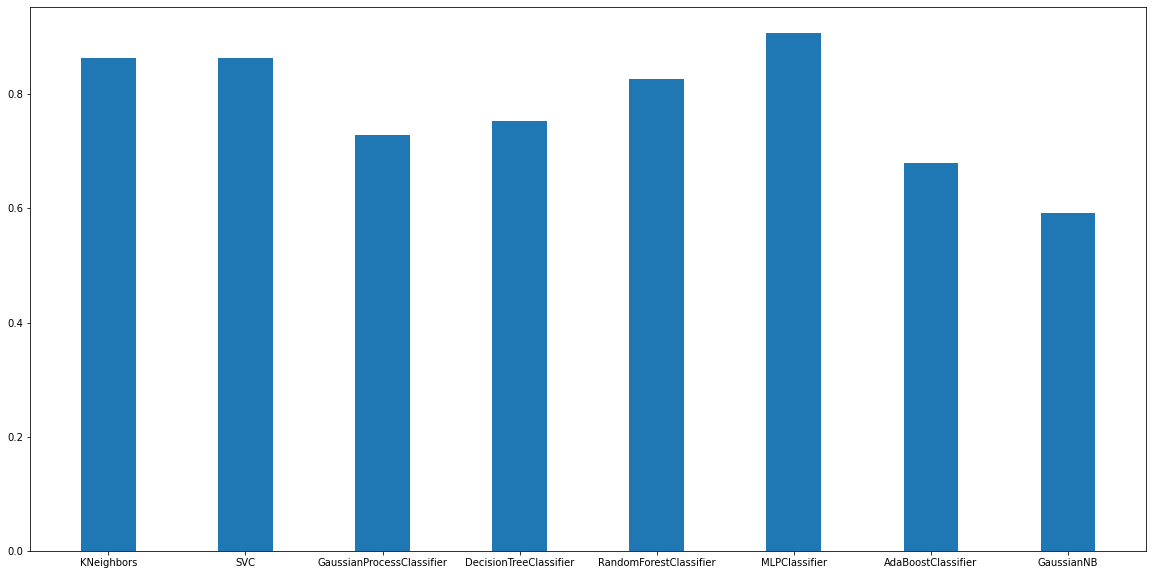

In [14]:
plt.figure(figsize=(20,10))
plt.xticks(range(len(accuracy)), clfs)
plt.bar(range(len(accuracy)),accuracy, width=0.4)

In [15]:
#Since MLPClassifier has the highest accuracy score so we'll work on that 
clf = MLPClassifier(random_state=0, max_iter=260)
xtrain, xtest, ytrain, ytest = train_test_split(df[['Close','Rolling Mean', 'Bollinger High', 'Bollinger Low']][13:].values,df['Call'][13:], test_size=0.33, random_state=42)
clf.fit(xtrain,ytrain)
pred = clf.predict(xtest)
accuracy_score(ytest,pred)

0.9074074074074074

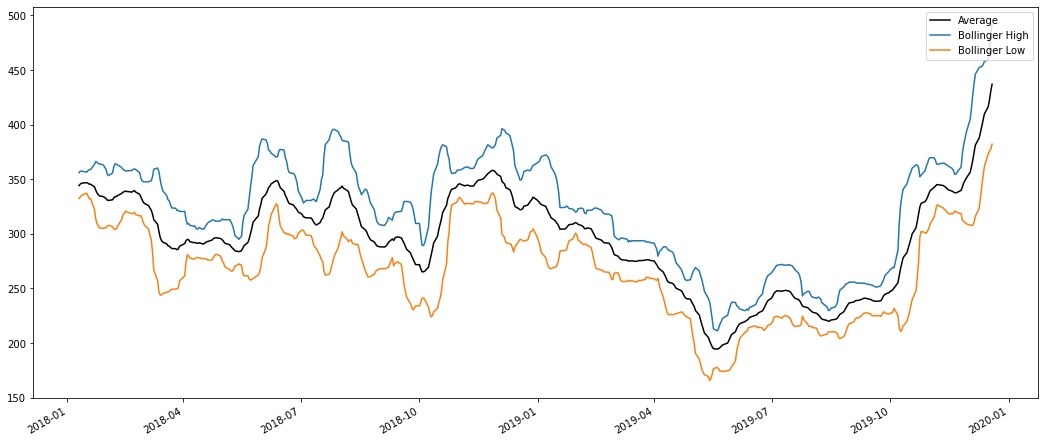

In [16]:
df['Date'] = df['Date'].astype(np.dtype('datetime64[ns]'))
plt.figure(figsize=(18,8))
plt.plot(df['Date'],df['Rolling Mean'], label='Average', c='black')
plt.plot(df['Date'],df['Bollinger High'], label='Bollinger High')
plt.plot(df['Date'],df['Bollinger Low'], label='Bollinger Low')
plt.legend(loc='upper right')
plt.gcf().autofmt_xdate()

In [18]:
#predicting the calls using MLP classifier
df['Pred Call'] = np.nan
df['Pred Call'] = np.concatenate((df['Pred Call'][:13].values,clf.predict(df[['Close','Rolling Mean', 'Bollinger High', 'Bollinger Low']][13:].values)))
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year,Percent Change,Trend,Rolling Mean,Bollinger High,Bollinger Low,Call,Pred Call
498,2018-01-17,340.470001,349.000000,339.750000,347.160004,347.160004,7103500,1,2018,0.751661,Slight Positive,346.305004,357.912710,334.697297,Hold Short / Liquidate Buy,Hold Short / Liquidate Buy
499,2018-01-16,337.540009,345.000000,334.799988,340.059998,340.059998,6474300,1,2018,-2.045168,Negative,346.800003,356.405938,337.194069,Hold Buy / Liquidate Short,Hold Buy / Liquidate Short
500,2018-01-12,338.630005,340.410004,333.670013,336.220001,336.220001,4825100,1,2018,-1.129212,Negative,346.262146,357.334972,335.189320,Hold Buy / Liquidate Short,Hold Buy / Liquidate Short
501,2018-01-11,335.239990,344.809998,333.260010,337.950012,337.950012,6645500,1,2018,0.514547,Slight Positive,345.455004,357.215667,333.694341,Hold Buy / Liquidate Short,Hold Buy / Liquidate Short
502,2018-01-10,332.200012,337.000000,330.000000,334.799988,334.799988,4309900,1,2018,-0.932098,Slight Negative,344.061432,355.925375,332.197489,Hold Buy / Liquidate Short,Hold Buy / Liquidate Short


## Strategy Returns

In [40]:
#using a different stock
voltas = pd.read_csv('./stocks/VOLTAS.NS.csv')[::-1]
voltas = voltas.dropna()
voltas.head()

,Date,Open,High,Low,Close,Adj Close,Volume
488,2020-01-09,655.299988,689.150024,655.299988,684.299988,684.299988,2697590.0
487,2020-01-08,649.000000,653.450012,647.000000,651.049988,651.049988,742490.0
486,2020-01-07,651.099976,660.000000,650.250000,654.500000,654.500000,1007897.0
485,2020-01-06,662.950012,662.950012,646.299988,649.900024,649.900024,1162203.0
484,2020-01-03,657.950012,665.000000,656.049988,663.700012,663.700012,1224987.0


In [41]:
#calculating 5 day rolling mean & std of VOLTAS.NS stock with the percent change between Open with Close & Low with High
voltas['Per. Change b/w Open & Close'] = voltas[['Open','Close']].pct_change(axis=1)['Close']
voltas['Per. Change b/w Low & High'] = voltas[['Low','High']].pct_change(axis=1)['High']
voltas['Rolling Mean'] = voltas['Close'].rolling(5).mean()
voltas['Rolling Std'] = voltas['Close'].rolling(5).std()
voltas

,Date,Open,High,Low,Close,Adj Close,Volume,Per. Change b/w Open & Close,Per. Change b/w Low & High,Rolling Mean,Rolling Std
488,2020-01-09,655.299988,689.150024,655.299988,684.299988,684.299988,2697590.0,0.044255,0.051656,NaN,NaN
487,2020-01-08,649.000000,653.450012,647.000000,651.049988,651.049988,742490.0,0.003159,0.009969,NaN,NaN
486,2020-01-07,651.099976,660.000000,650.250000,654.500000,654.500000,1007897.0,0.005222,0.014994,NaN,NaN
485,2020-01-06,662.950012,662.950012,646.299988,649.900024,649.900024,1162203.0,-0.019685,0.025762,NaN,NaN
484,2020-01-03,657.950012,665.000000,656.049988,663.700012,663.700012,1224987.0,0.008739,0.013642,660.690002,14.266755
...,...,...,...,...,...,...,...,...,...,...,...
4,2018-01-16,635.000000,639.950012,618.500000,623.049988,606.145203,921801.0,-0.018819,0.034681,618.980005,10.978474
3,2018-01-15,635.599976,639.000000,626.549988,632.450012,615.290283,1014637.0,-0.004956,0.019871,620.480005,12.416297
2,2018-01-12,629.000000,645.450012,629.000000,633.950012,616.749573,2080069.0,0.007870,0.026153,623.630005,13.631654
1,2018-01-11,633.900024,634.650024,621.299988,625.849976,608.869202,1177079.0,-0.012699,0.021487,628.709998,4.524171


In [43]:
def actionsetter(col):
    actions = []
    col = col.values
    for x in range(len(col) - 1):
        if col[x] < col[x + 1]:
            actions.append(1)
        elif col[x] > col[x + 1]:
            actions.append(-1)
    actions.append(np.nan)
    return actions

In [45]:
voltas['Action'] = actionsetter(voltas['Close'])
voltas.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Per. Change b/w Open & Close,Per. Change b/w Low & High,Rolling Mean,Rolling Std,Action
488,2020-01-09,655.299988,689.150024,655.299988,684.299988,684.299988,2697590.0,0.044255,0.051656,NaN,NaN,-1.0
487,2020-01-08,649.000000,653.450012,647.000000,651.049988,651.049988,742490.0,0.003159,0.009969,NaN,NaN,1.0
486,2020-01-07,651.099976,660.000000,650.250000,654.500000,654.500000,1007897.0,0.005222,0.014994,NaN,NaN,-1.0
485,2020-01-06,662.950012,662.950012,646.299988,649.900024,649.900024,1162203.0,-0.019685,0.025762,NaN,NaN,1.0
484,2020-01-03,657.950012,665.000000,656.049988,663.700012,663.700012,1224987.0,0.008739,0.013642,660.690002,14.266755,-1.0


In [49]:
#Using Random Forest classifier
clf = RandomForestClassifier(random_state=0)
xtrain, xtest, ytrain, ytest = train_test_split(voltas[['Per. Change b/w Open & Close','Per. Change b/w Low & High','Rolling Mean','Rolling Std']][5:-1].values,voltas['Action'][5:-1], test_size=0.50, random_state=42)
clf.fit(xtrain,ytrain)
pred = clf.predict(xtest)

In [50]:
accuracy_score(ytest,pred)

0.8838174273858921

In [52]:
voltas['Per Change'] = voltas['Close'].pct_change()
voltas['Per Change'] = voltas['Per Change'].fillna(0)
voltas.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Per. Change b/w Open & Close,Per. Change b/w Low & High,Rolling Mean,Rolling Std,Action,Per Change
488,2020-01-09,655.299988,689.150024,655.299988,684.299988,684.299988,2697590.0,0.044255,0.051656,NaN,NaN,-1.0,0.000000
487,2020-01-08,649.000000,653.450012,647.000000,651.049988,651.049988,742490.0,0.003159,0.009969,NaN,NaN,1.0,-0.048590
486,2020-01-07,651.099976,660.000000,650.250000,654.500000,654.500000,1007897.0,0.005222,0.014994,NaN,NaN,-1.0,0.005299
485,2020-01-06,662.950012,662.950012,646.299988,649.900024,649.900024,1162203.0,-0.019685,0.025762,NaN,NaN,1.0,-0.007028
484,2020-01-03,657.950012,665.000000,656.049988,663.700012,663.700012,1224987.0,0.008739,0.013642,660.690002,14.266755,-1.0,0.021234


In [64]:
voltas['Strategy Returns'] = voltas['Per Change'][246:-1] * pred
voltas.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Per. Change b/w Open & Close,Per. Change b/w Low & High,Rolling Mean,Rolling Std,Action,Per Change,Strategy Returns
4,2018-01-16,635.000000,639.950012,618.500000,623.049988,606.145203,921801.0,-0.018819,0.034681,618.980005,10.978474,1.0,-0.008277,-0.008277
3,2018-01-15,635.599976,639.000000,626.549988,632.450012,615.290283,1014637.0,-0.004956,0.019871,620.480005,12.416297,1.0,0.015087,0.015087
2,2018-01-12,629.000000,645.450012,629.000000,633.950012,616.749573,2080069.0,0.007870,0.026153,623.630005,13.631654,-1.0,0.002372,-0.002372
1,2018-01-11,633.900024,634.650024,621.299988,625.849976,608.869202,1177079.0,-0.012699,0.021487,628.709998,4.524171,1.0,-0.012777,0.012777
0,2018-01-10,650.000000,654.400024,626.650024,629.299988,612.225647,1116965.0,-0.031846,0.044283,628.919995,4.521849,NaN,0.005513,NaN


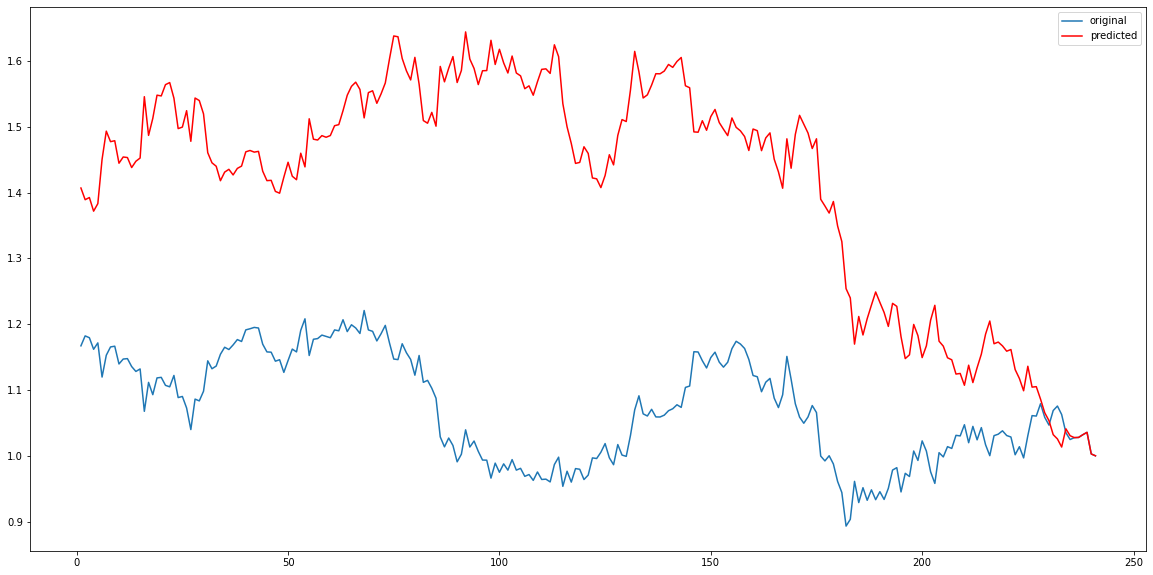

In [65]:
#plotting predicted cumulative returns and the original cumulative returns of the test data
plt.figure(figsize=(20,10))
plt.plot((voltas['Per Change'][246:-1] + 1).cumprod(), label='original')
plt.plot((voltas['Strategy Returns'] + 1).cumprod(), c='r', label='predicted')
plt.legend(loc='best')